In [1]:
%matplotlib inline
from env import get_connection, password, host, user
import acquire_zillow
import acquire_mall
import prepare_mall
import prepare_zillow
import explore_zillow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
properties = pd.read_csv('zillow_properties.csv', sep='\t')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
properties.drop(['Unnamed: 0', 'parcelid.1'], axis=1, inplace=True)

In [4]:
properties.shape

(167888, 60)

## Preparation Phase

### Filling nulls with zeros. These properties were chosen because they either are binary and just didn't have 0's, or they are some type of cnt that was left blank since it was 0.

In [5]:
properties = prepare_zillow.replace_nulls_with_zeros(properties, ['hashottuborspa', 'poolcnt', 'poolsizesum', 
                                                                  'basementsqft', 'decktypeid', 'fireplacecnt',
                                                                  'garagecarcnt'])

### Grabbing only those properties that are single unit and have lat and lon. 
The columns that are transformed to object dtypes are chosen because they either are just simple id numbers or a binary representing yes or no.

In [6]:
properties = prepare_zillow.single_lat_lon_objects(properties, ['parcelid', 'buildingqualitytypeid', 
                                                                'decktypeid', 'fips', 'hashottuborspa', 
                                                                'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 
                                                                'regionidcity', 'regionidcounty',
                                                                'regionidneighborhood', 'regionidzip', 
                                                                'fireplaceflag'])


In [7]:
properties.shape

(97618, 60)

In [8]:
prepare_zillow.missing_vals_cols(properties)

buildingqualitytypeid has 954 missing values, accounting for 0.98% of that column.
calculatedbathnbr has 8 missing values, accounting for 0.01% of that column.
finishedfloor1squarefeet has 97618 missing values, accounting for 100.00% of that column.
calculatedfinishedsquarefeet has 4 missing values, accounting for 0.00% of that column.
finishedsquarefeet12 has 15 missing values, accounting for 0.02% of that column.
finishedsquarefeet13 has 97618 missing values, accounting for 100.00% of that column.
finishedsquarefeet15 has 97607 missing values, accounting for 99.99% of that column.
finishedsquarefeet50 has 97618 missing values, accounting for 100.00% of that column.
finishedsquarefeet6 has 97618 missing values, accounting for 100.00% of that column.
fullbathcnt has 8 missing values, accounting for 0.01% of that column.
garagetotalsqft has 97610 missing values, accounting for 99.99% of that column.
lotsizesquarefeet has 2516 missing values, accounting for 2.58% of that column.
pooltype

### Do any columns have too many NaN's to be useful?
After looking at the print out and seeing which columns have what percentage of null values, I decide that if a column is more than 30% null, it should be dropped.

In [9]:
prepare_zillow.drop_col_if_too_many_nulls(properties, .30)

Nulls still present but not nearly as many.

In [10]:
prepare_zillow.missing_vals_cols(properties)

buildingqualitytypeid has 954 missing values, accounting for 0.98% of that column.
calculatedbathnbr has 8 missing values, accounting for 0.01% of that column.
calculatedfinishedsquarefeet has 4 missing values, accounting for 0.00% of that column.
finishedsquarefeet12 has 15 missing values, accounting for 0.02% of that column.
fullbathcnt has 8 missing values, accounting for 0.01% of that column.
lotsizesquarefeet has 2516 missing values, accounting for 2.58% of that column.
propertyzoningdesc has 403 missing values, accounting for 0.41% of that column.
regionidcity has 2054 missing values, accounting for 2.10% of that column.
regionidzip has 18 missing values, accounting for 0.02% of that column.
yearbuilt has 20 missing values, accounting for 0.02% of that column.
structuretaxvaluedollarcnt has 110 missing values, accounting for 0.11% of that column.
taxamount has 8 missing values, accounting for 0.01% of that column.
censustractandblock has 199 missing values, accounting for 0.20% o

In [11]:
properties.shape

(97618, 38)

### Dropping the rows with remaining null values.

In [12]:
properties.dropna(inplace=True)

In [13]:
properties.shape

(90578, 38)

In [14]:
properties.isna().sum()

parcelid                        0
basementsqft                    0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
decktypeid                      0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
garagecarcnt                    0
hashottuborspa                  0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
poolsizesum                     0
propertycountylandusecode       0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollar

In [15]:
properties[properties.calculatedfinishedsquarefeet != properties.finishedsquarefeet12]

,parcelid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc


In [16]:
properties[properties.calculatedbathnbr != properties.bathroomcnt]

,parcelid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc


##### Dropping `finishedsquarefeet12` since it's values are the same as `calculatedfinishedsquarefeet`. Same with `calculatedbathnbr` and `bathroomcnt`.

In [17]:
properties.drop(['finishedsquarefeet12', 'calculatedbathnbr'], axis=1, inplace=True)

##### Dropping `fullbathcnt` since it is similar to `bathroomcnt`.

In [18]:
properties.drop(['fullbathcnt'], axis=1, inplace=True)

##### I don't think land use code or zoning description will be a factor in estimate error.
They will be dropped.

In [19]:
properties.propertycountylandusecode.unique()

array(['0100', '010C', '010E', '0104', '0101', '01DC', '012C', '010G',
       '0103', '010M', '01HC', '0108', '0109', '010H', '010V', '0102',
       '0130', '012E', '0110', '010', '0131', '0133', '0105', '012D',
       '0113'], dtype=object)

In [20]:
properties.drop(['propertycountylandusecode', 'propertyzoningdesc'], axis=1, inplace=True)

##### Dropping `roomcnt` since it's values don't make sense.

In [21]:
properties.drop(['roomcnt'], axis=1, inplace=True)

In [22]:
properties.shape

(90578, 32)

##### Dropping `basementsqft`, `decktypeid`, `poolsizesum`, and `fireplacecnt`  since the values are all 0.

In [23]:
properties.drop(['basementsqft', 'decktypeid', 'fireplacecnt', 'poolsizesum'], axis=1, inplace=True)

##### Are the descriptions useful? Example: `airconditioningdesc` can be centralized or refrigeration, but can also just be 'yes'.
Seeing that properties can have 'presumably' no air conditioning but still have a bed or bath, it seems like this column may not be useful.

In [24]:
# properties[(properties.airconditioningdesc.isna()) & ((properties.bathroomcnt > 0) | (properties.bedroomcnt > 0))].describe()

# Outliers kept in for now

### Handling of Outliers
Outliers will be determined using IQR, specifically by looking for values that are over the Q3 point by 1.5 (IQR) or those that are under the Q1 point by 1.5 (IQR). I will be using my `detect_and_remove_outliers()` to do so. I will be handling some columns differently. For bedroom and bathroom counts, any outliers will be grouped into those with more than x amount.

In [25]:
# prepare_zillow.detect_and_remove_outliers(properties)

In [26]:
properties.shape

(90578, 28)

In [27]:
properties.bedroomcnt.describe()

count    90578.000000
mean         2.949833
std          0.990399
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: bedroomcnt, dtype: float64

In [28]:
properties.bedroomcnt.value_counts()

3.0     38399
2.0     24797
4.0     17863
5.0      4206
1.0      4074
6.0       734
0.0       310
7.0       145
8.0        36
9.0        11
11.0        1
16.0        1
10.0        1
Name: bedroomcnt, dtype: int64

##### If a property has more than 6 bedrooms, it will just be listed as having 6.

In [29]:
properties.loc[properties.bedroomcnt > 6, 'bedroomcnt'] = 6
properties.bedroomcnt.describe()

count    90578.000000
mean         2.946863
std          0.978225
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: bedroomcnt, dtype: float64

In [30]:
properties.bathroomcnt.value_counts()

2.0     41663
3.0     22567
1.0     20627
4.0      3629
5.0      1372
6.0       479
7.0       151
8.0        58
9.0        22
10.0        6
11.0        3
20.0        1
Name: bathroomcnt, dtype: int64

##### If a property has more than 4 bathrooms, it will just be listed as having 4.

In [31]:
properties.loc[properties.bathroomcnt > 4, 'bathroomcnt'] = 4
properties.bathroomcnt.describe()

count    90578.000000
mean         2.147740
std          0.841246
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: bathroomcnt, dtype: float64

## Exploration Phase

##### Plotting a pairplot and a heatmap of all ordered numeric variables.

In [32]:
# explore_zillow.pair_heat_(properties[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 
#                           'latitude', 'longitude', 'lotsizesquarefeet', 'rawcensustractandblock', 'yearbuilt', 
#                          'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 
#                          'logerror']].sample(100))

##### Plotting a relplot of two ordered numerical variables and one categorical variable.

In [33]:
# explore_zillow.relplot_TwoNum_OneCat(properties.sample(1000), 'latitude', 'longitude', 'heatingorsystemdesc')

##### Plotting subplots of swarmplots for a categorical variable and listed numerical variables.

In [34]:
# explore_zillow.swarm_subs(properties.sample(500), 'heatingorsystemdesc', 
#                           ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt'])

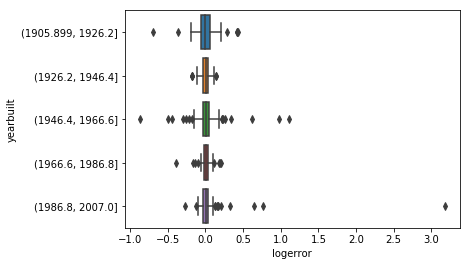

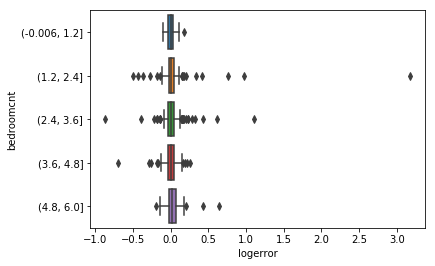

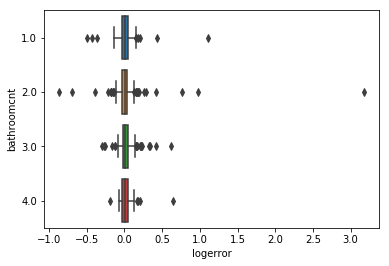

In [35]:
explore_zillow.cat_distributions(properties.sample(500), ['yearbuilt', 'bedroomcnt', 'bathroomcnt'], 'logerror')

### Performing ttests to check for differences in logerror between groups.

In [39]:
a = properties[properties.yearbuilt < 1920]
b = properties[properties.yearbuilt >= 1920]

explore_zillow.print_ttest_results(a.logerror, b.logerror)

Ttest_indResult(statistic=-1.4761090568060269, pvalue=0.13991809427498583)
The p-value is : 0.13991809427498583
Not significant.


In [40]:
a = properties[properties.bathroomcnt < 3]
b = properties[properties.bathroomcnt >= 3]

explore_zillow.print_ttest_results(a.logerror, b.logerror)

Ttest_indResult(statistic=-7.293564161519822, pvalue=3.043154812081684e-13)
The p-value is : 3.043154812081684e-13
There is a significant difference.


In [47]:
a = properties[properties.hashottuborspa == 0]
b = properties[properties.hashottuborspa == 1]

explore_zillow.print_ttest_results(a.logerror, b.logerror)

Ttest_indResult(statistic=-0.5319585059499564, pvalue=0.5947560392944973)
The p-value is : 0.5947560392944973
Not significant.


In [49]:
a = properties[properties.heatingorsystemdesc == 'Central']
b = properties[properties.heatingorsystemdesc == 'Floor/Wall']

explore_zillow.print_ttest_results(a.logerror, b.logerror)

Ttest_indResult(statistic=2.8525314530300276, pvalue=0.004338234489510702)
The p-value is : 0.004338234489510702
There is a significant difference.


In [53]:
a = properties[properties.poolcnt == 0]
b = properties[properties.poolcnt == 1]

explore_zillow.print_ttest_results(a.logerror, b.logerror)

Ttest_indResult(statistic=3.095853269087568, pvalue=0.001963073081064054)
The p-value is : 0.001963073081064054
There is a significant difference.


In [54]:
a = properties[properties.yearbuilt < 1950]
b = properties[properties.yearbuilt >= 1950]

explore_zillow.print_ttest_results(a.logerror, b.logerror)

Ttest_indResult(statistic=-6.638481087857133, pvalue=3.187116709523059e-11)
The p-value is : 3.187116709523059e-11
There is a significant difference.


In [52]:
properties.dtypes

parcelid                         object
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid            object
calculatedfinishedsquarefeet    float64
fips                             object
garagecarcnt                    float64
hashottuborspa                   object
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
rawcensustractandblock          float64
regionidcity                     object
regionidcounty                   object
regionidzip                      object
unitcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
censustractandblock             float64
logerror                        float64
